# Analysis on Weather reports

In [5]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from statsmodels.tsa.stattools import pacf, acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Reading in data

In [6]:
df = pd.read_csv('Timeseries dataset weather/weather_dataset.csv',index_col="time")
df.head()

,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction
time,,,,,,,,,,,,,,,
2000-01-01T00:00,-0.1,97,-0.5,0.0,0.0,0.0,1024.2,1019.3,87,76,3,56,0.02,5.9,169
2000-01-01T01:00,-0.2,97,-0.7,0.0,0.0,0.0,1024.4,1019.5,89,79,1,58,0.02,5.8,173
2000-01-01T02:00,-0.1,96,-0.6,0.0,0.0,0.0,1024.5,1019.6,100,89,9,80,0.02,6.1,180
2000-01-01T03:00,-0.2,96,-0.7,0.0,0.0,0.0,1024.2,1019.3,100,92,34,92,0.02,6.8,183
2000-01-01T04:00,-0.2,96,-0.8,0.0,0.0,0.0,1024.0,1019.1,100,76,51,98,0.02,6.8,183


In [7]:
df.describe()

,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction
count,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000,214152.000000
mean,10.247511,75.838531,5.670377,0.070786,0.065972,0.003655,1015.451026,1010.808191,55.761310,36.789505,33.327426,38.301141,0.424815,12.907395,196.418380
std,8.247190,16.608345,6.603891,0.293038,0.288227,0.034378,9.338185,9.281605,36.961479,39.596580,36.953296,41.909035,0.512329,6.128445,92.371503
min,-21.600000,14.000000,-26.200000,0.000000,0.000000,0.000000,965.600000,961.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,65.000000,1.200000,0.000000,0.000000,0.000000,1009.800000,1005.200000,22.000000,0.000000,0.000000,0.000000,0.090000,8.300000,117.000000
50%,10.100000,80.000000,6.000000,0.000000,0.000000,0.000000,1015.800000,1011.200000,57.000000,18.000000,17.000000,15.000000,0.220000,12.000000,218.000000
75%,16.400000,90.000000,10.700000,0.000000,0.000000,0.000000,1021.400000,1016.700000,96.000000,80.000000,65.000000,89.000000,0.560000,16.500000,270.000000
max,37.700000,100.000000,22.700000,15.800000,15.800000,1.610000,1049.600000,1044.300000,100.000000,100.000000,100.000000,100.000000,5.520000,60.200000,360.000000


### Description
from using the description function we see a few coloums are just majority zero values like precepitation,rainfall and snowfall.

considering this there is little information we can get out from it thus those collumns will be dropped

In [8]:
df.drop(columns=['precipitation (mm)','snowfall (cm)','rain (mm)'],inplace=True)

In [9]:
## checking for null values and removing them if any
df.isnull().sum()

temperature                      0
relative_humidity                0
dew_point                        0
pressure_msl (hPa)               0
surface_pressure (hPa)           0
cloud_cover (%)                  0
cloud_cover_low (%)              0
cloud_cover_mid (%)              0
cloud_cover_high (%)             0
vapour_pressure_deficit (kPa)    0
wind_speed_10m (km/h)            0
wind_direction                   0
dtype: int64

### Analysis 
Seeing as the data is relatively clean and we have removed columns with data we deem unnecessary we now will look into relationship between columns and check the Correlation  of the data

In [10]:
df.select_dtypes(include=['number']).corr()

,temperature,relative_humidity,dew_point,pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction
temperature,1.000000,-0.560423,0.882092,-0.101467,-0.087076,-0.232837,-0.329281,-0.030886,0.039766,0.763622,-0.054095,0.020913
relative_humidity,-0.560423,1.000000,-0.114341,-0.068578,-0.076665,0.321598,0.372768,0.114759,0.100123,-0.848484,-0.124334,0.065268
dew_point,0.882092,-0.114341,1.000000,-0.160823,-0.148121,-0.100547,-0.193535,0.027102,0.106181,0.405918,-0.120769,0.064649
pressure_msl (hPa),-0.101467,-0.068578,-0.160823,1.000000,0.999891,-0.212402,-0.041713,-0.326513,-0.266405,0.003749,-0.285987,-0.073692
surface_pressure (hPa),-0.087076,-0.076665,-0.148121,0.999891,1.000000,-0.216005,-0.046487,-0.327360,-0.266163,0.014612,-0.287100,-0.073397
cloud_cover (%),-0.232837,0.321598,-0.100547,-0.212402,-0.216005,1.000000,0.790828,0.648297,0.396847,-0.304155,0.195459,0.161231
cloud_cover_low (%),-0.329281,0.372768,-0.193535,-0.041713,-0.046487,0.790828,1.000000,0.261929,0.017568,-0.350636,0.173172,0.134635
cloud_cover_mid (%),-0.030886,0.114759,0.027102,-0.326513,-0.327360,0.648297,0.261929,1.000000,0.372409,-0.102847,0.190286,0.100603
cloud_cover_high (%),0.039766,0.100123,0.106181,-0.266405,-0.266163,0.396847,0.017568,0.372409,1.000000,-0.060982,0.059101,-0.023211
vapour_pressure_deficit (kPa),0.763622,-0.848484,0.405918,0.003749,0.014612,-0.304155,-0.350636,-0.102847,-0.060982,1.000000,-0.002051,-0.054572


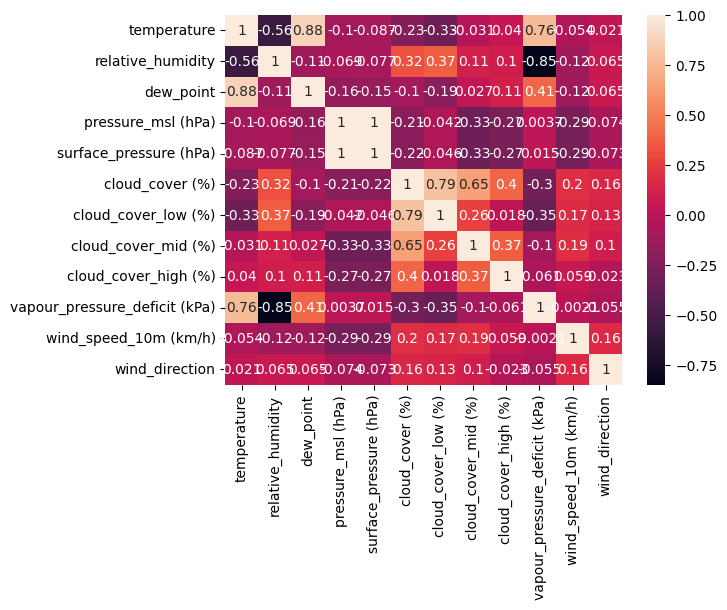

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()  

### Results from correlation 
- first result is that we see that pressure_msl and surface pressure are perfectly correlated and we can assume we can use only 1 of these in our data 
- The only high correlation we have next is the correlation between temparature and dew point out side of that the correlation between other columns in the data is fairly low or close to no correlation 

In [12]:
df.drop(columns=["surface_pressure (hPa)"],inplace=True)

In [13]:
df.head()

,temperature,relative_humidity,dew_point,pressure_msl (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction
time,,,,,,,,,,,
2000-01-01T00:00,-0.1,97,-0.5,1024.2,87,76,3,56,0.02,5.9,169
2000-01-01T01:00,-0.2,97,-0.7,1024.4,89,79,1,58,0.02,5.8,173
2000-01-01T02:00,-0.1,96,-0.6,1024.5,100,89,9,80,0.02,6.1,180
2000-01-01T03:00,-0.2,96,-0.7,1024.2,100,92,34,92,0.02,6.8,183
2000-01-01T04:00,-0.2,96,-0.8,1024.0,100,76,51,98,0.02,6.8,183


#### Building our model 
- First we will calculate our base line data
- We will split the data into training and test data
- fit the model to see if it can predict future weather patterns 

In [14]:
#### Analysis
# test_data,train_data = df[:int(len(df)*0.8)],df[int(len(df)*0.8):]
target = "temperature"
feature = ["relative_humidity","dew_point","pressure_msl (hPa)"]
X = df[feature]
y = df[target]
x_train,x_test = train_test_split(X,test_size=0.2,shuffle=False)
y_train,y_test = train_test_split(y,test_size=0.2,shuffle=False)

In [15]:
##Baseline data
y_mean = y.mean()
y_pred = [y_mean for _ in range(len(y))]
mean_absolute_error(y,y_pred)
print("Mean temperature is:",round(y_mean,2))
print("MAE for baseline model is:",round(mean_absolute_error(y,y_pred),2))

Mean temperature is: 10.25
MAE for baseline model is: 6.84


In [16]:
## Building Pipeline and train Model
model = make_pipeline(OneHotEncoder(use_cat_names=True),LinearRegression())
model.fit(x_train,y_train)

,steps,"[('onehotencoder', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,[]
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


In [17]:
## Testing the model
y_pred = model.predict(x_test)
test_mae = mean_absolute_error(y_test,y_pred)
print("MAE for test data is:",round(test_mae,2))
print("Score of the model",model.score(x_test,y_test))

MAE for test data is: 0.55
Score of the model 0.9880085272256527


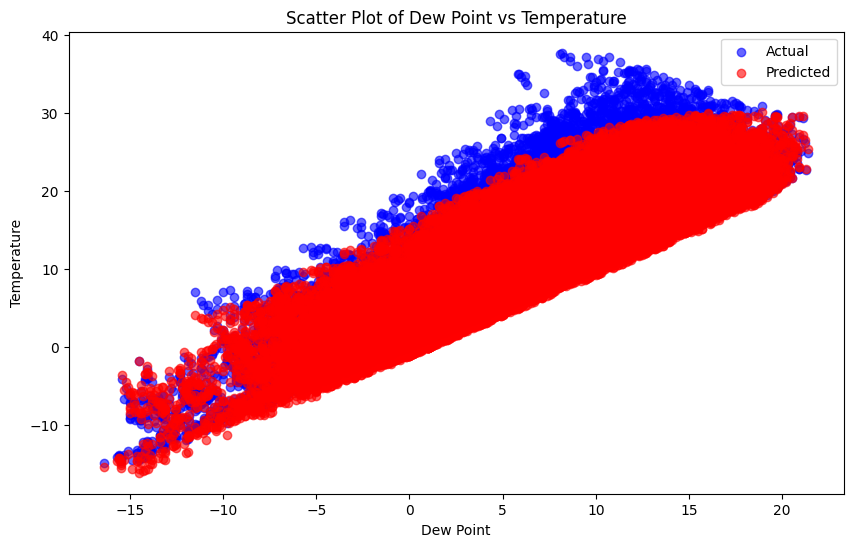

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test['dew_point'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(x_test['dew_point'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Scatter Plot of Dew Point vs Temperature')
plt.xlabel('Dew Point')
plt.ylabel('Temperature')
plt.legend()
plt.show()